# PREPARAÇÃO DOS DADOS

* Gerar Metadados da ABT (Tabela Analítica de Modelagem)
* Tratamento de missing (nulos)
* Tratamento de categóricas de alta cardinalidade (LabelEncoder)
* Tratamento de categóricas de baixa cardinalidade (OneHotEncoder)
* Aplicar normalização a toda tabela de modelagem (ABT)
* Gerar artefatos para implantação do data prep realizado






In [ ]:
### Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)


#### Lendo os dados disponibilizados

In [ ]:
df= pd.read_csv ('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/train.csv')

In [ ]:
df_test = pd.read_csv ('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/test.csv')

In [ ]:
# Metadados

# Construindo função para obter metadados
def metadados(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
# Obtendo metadados

metadados_df = metadados(df)
metadados_df.head(100)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,HeatingQC,object,0,0.00,5
1,Fence,object,1179,80.75,4
2,ExterQual,object,0,0.00,4
3,FireplaceQu,object,690,47.26,5
4,Foundation,object,0,0.00,6
5,BsmtQual,object,37,2.53,4
6,BsmtCond,object,37,2.53,4
7,BsmtExposure,object,38,2.60,4
8,BsmtFinType1,object,37,2.53,6
9,MiscFeature,object,1406,96.30,4


## Preparação dos dados

In [ ]:
### Bibliotecas utilizadas

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pickle

In [ ]:
### 1. Separar tabela de treino e de teste.

train, test = train_test_split(df, test_size=0.3, random_state=42)


In [ ]:
train.shape, test.shape

((1022, 81), (438, 81))

In [ ]:
### 2. Remover lista de variáveis para retirar dos tratamentos.

# lista de vars para retirar dos tratamentos

lista_spec = ['Id', 'SalePrice']

df_01 = train.drop(axis=1,columns = lista_spec)
df_01_test = test.drop(axis=1,columns=lista_spec)

In [ ]:
### 3. Atualizando os Metadados

# Obtendo metadados

metadados_df = metadados(df_01)
metadados_df.head(100)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,HeatingQC,object,0,0.00,5
1,KitchenQual,object,0,0.00,4
2,Foundation,object,0,0.00,6
3,BsmtQual,object,26,2.54,4
4,BsmtCond,object,26,2.54,4
5,BsmtExposure,object,26,2.54,4
6,BsmtFinType1,object,26,2.54,6
7,BsmtFinType2,object,26,2.54,6
8,Heating,object,0,0.00,6
9,MSZoning,object,0,0.00,5


<Axes: >

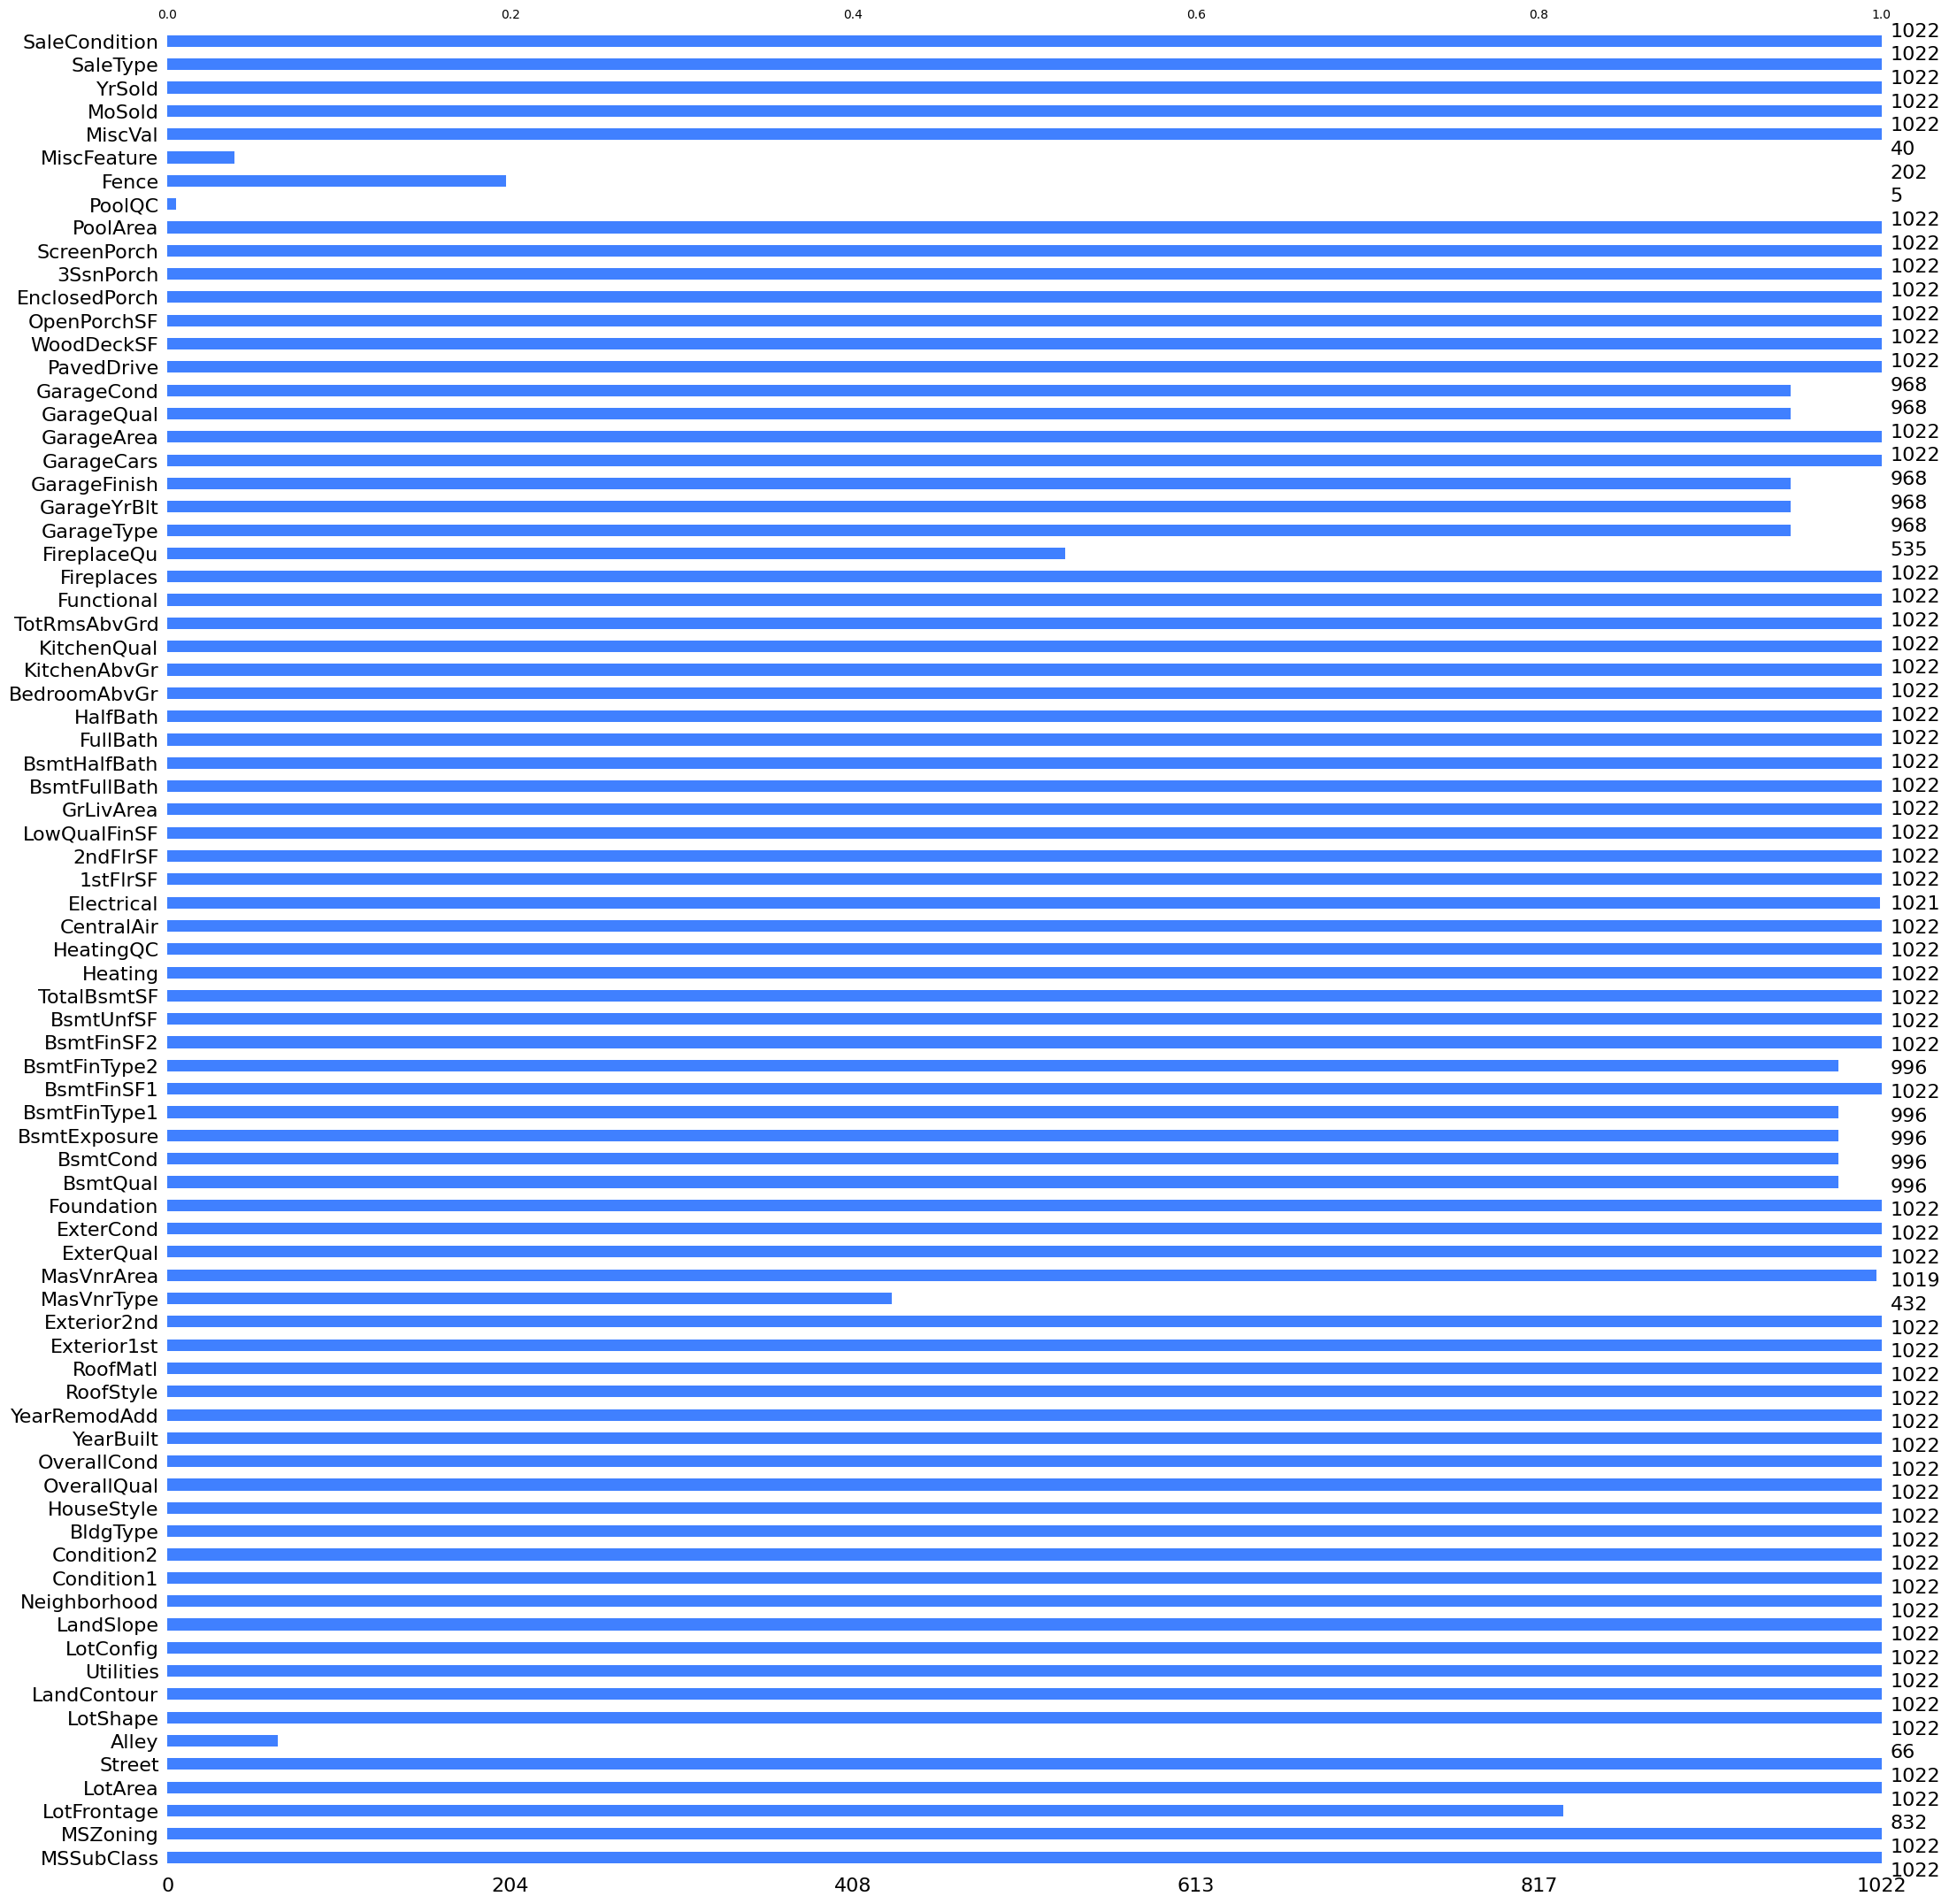

In [ ]:
### 4. Tratamento de valores nulos.

import missingno as msno
# msno.matrix(abt_01, color=(0.25, 0.5, 1))  # tom de azul claro
msno.bar(df_01, color=(0.25, 0.5, 1))  # tom de azul claro

In [ ]:
# variáveis acima de 70% de valores nulos, vamos remover.

# Filtrando o DataFrame - Variáveis numéricas
missing_cutoff = 70
df_numericas_drop_nulos = metadados_df[(metadados_df['percent_nulos'] >= missing_cutoff)]
lista_drop_nulos_numericas = list(df_numericas_drop_nulos.nome_variavel.values)
print('Variáveis que serão excluídas por alto percentual de nulos: ',lista_drop_nulos_numericas)

# retirando lista de variáveis com alto percentual de nulos
abt_02 = df_01.drop(axis=1,columns=lista_drop_nulos_numericas)
abt_02.shape

Variáveis que serão excluídas por alto percentual de nulos:  ['PoolQC', 'Fence', 'MiscFeature', 'Alley']


(1022, 75)

In [ ]:
# Salvar a lista em um arquivo .pkl
with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_drop_nullvars_a014.pkl', 'wb') as f:
    pickle.dump(lista_drop_nulos_numericas, f)

In [ ]:
abt_02.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,20,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,6,1970,1970,Hip,CompShg,Plywood,Plywood,BrkFace,288.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,1304,1304,GasA,Gd,Y,SBrkr,1682,0,0,1682,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1970.0,Unf,2,530,TA,TA,Y,98,0,0,0,0,0,0,5,2008,WD,Normal
1452,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,0,5,2006,WD,Normal
762,60,FV,72.0,8640,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,24,Unf,0,732,756,GasA,Ex,Y,SBrkr,764,783,0,1547,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2009.0,Unf,2,614,TA,TA,Y,169,45,0,0,0,0,0,6,2010,Con,Normal
932,20,RL,84.0,11670,Pave,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,VinylSd,ImStucc,Stone,302.0,Ex,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,1905,1905,GasA,Ex,Y,SBrkr,1905,0,0,1905,0,0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2006.0,Fin,3,788,TA,TA,Y,0,191,0,0,0,0,0,3,2007,WD,Normal
435,60,RL,43.0,10667,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,PosN,Norm,1Fam,2Story,7,6,1996,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,385,ALQ,344,70,799,GasA,Ex,Y,SBrkr,827,834,0,1661,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,1996.0,RFn,2,550,TA,TA,Y,158,61,0,0,0,0,0,4,2009,ConLw,Normal


In [ ]:
# Aplicando a exclusão das mesmas variáveis na base de teste
abt_01_test = df_01_test.drop(axis=1, columns=lista_drop_nulos_numericas)
abt_01_test.shape

(438, 75)

In [ ]:
## Atualizando Metadados
# Obtendo metadados

metadados_df = metadados(abt_02)
metadados_df.head(100)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,Heating,object,0,0.00,6
1,CentralAir,object,0,0.00,2
2,ExterCond,object,0,0.00,5
3,Foundation,object,0,0.00,6
4,BsmtQual,object,26,2.54,4
5,BsmtCond,object,26,2.54,4
6,BsmtExposure,object,26,2.54,4
7,BsmtFinType1,object,26,2.54,6
8,BsmtFinType2,object,26,2.54,6
9,MSZoning,object,0,0.00,5


In [ ]:
#Função para Preencher as variáveis numéricas com a média e
#Substituir nulos por “VERIFICAR” para variáveis categóricas.

def custom_fillna(df):
    import pandas as pd

    import numpy as np
    # Substituindo -1 por nulos
    # Esta função serve para este modelo ou caso específico, porque pode ser que em outras situações o missing não venha marcado com -1

    df.replace(-1, np.nan, inplace=True)
    numerical_cols = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
    means = {}

    for col in numerical_cols:
        means[col] = df[col].mean()
        df[col].fillna(means[col], inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('VERIFICAR')

    return df, means # a função retorna dois objetos:
                     # df: o próprio DataFrame, mas com os valores ausentes já tratados (chamaremos de "DataFrame tratado").
                     # means: um dicionário contendo a média de cada coluna numérica, usado para preencher os NaN.



In [ ]:
## desempacotando os dois valores retornados da função:

abt_03, means = custom_fillna(abt_02)

In [ ]:
# Salvando o dicionário means (que tem as médias das colunas numéricas) em um arquivo ".pkl".

with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_fillna_a014.pkl', 'wb') as f:
  pickle.dump(means, f)

In [ ]:
with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_fillna_a014.pkl', 'rb') as f:
  loaded_means = pickle.load(f)  ## Esse código está abrindo o arquivo onde foi salvo o dicionário com as médias
                                 ## e carregando ele de volta para o programa, para poder usá-lo novamente,
                                 # ou seja, ele abre o arquivo .pkl que salvo antes e carrega de volta o conteúdo para uma variável chamada loaded_means.
loaded_means

{'MSSubClass': np.float64(57.05968688845401),
 'LotFrontage': np.float64(70.375),
 'LotArea': np.float64(10745.437377690801),
 'OverallQual': np.float64(6.128180039138943),
 'OverallCond': np.float64(5.564579256360078),
 'YearBuilt': np.float64(1970.995107632094),
 'YearRemodAdd': np.float64(1984.757338551859),
 'MasVnrArea': np.float64(105.26104023552503),
 'BsmtFinSF1': np.float64(446.1761252446184),
 'BsmtFinSF2': np.float64(42.36888454011741),
 'BsmtUnfSF': np.float64(571.2230919765167),
 'TotalBsmtSF': np.float64(1059.7681017612524),
 '1stFlrSF': np.float64(1169.7377690802348),
 '2ndFlrSF': np.float64(353.73874755381604),
 'LowQualFinSF': np.float64(5.76614481409002),
 'GrLivArea': np.float64(1529.242661448141),
 'BsmtFullBath': np.float64(0.4227005870841487),
 'BsmtHalfBath': np.float64(0.05968688845401174),
 'FullBath': np.float64(1.582191780821918),
 'HalfBath': np.float64(0.3747553816046967),
 'BedroomAbvGr': np.float64(2.8904109589041096),
 'KitchenAbvGr': np.float64(1.045009

In [ ]:

def custom_fillna_prod(df, means):
    import numpy as np
    import pandas as pd
    df.replace(-1, np.nan, inplace=True)
    for col, mean_value in means.items():
      df[col].fillna(mean_value, inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('VERIFICAR')

    return df

In [ ]:
test_prod = custom_fillna_prod(abt_01_test,loaded_means)
test_prod.shape

(438, 75)

In [ ]:
test_prod.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,20,RL,70.0,8414,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,VERIFICAR,0.0,TA,TA,CBlock,TA,TA,No,GLQ,663,Unf,0,396,1059,GasA,TA,Y,SBrkr,1068,0,0,1068,0,1,1,0,3,1,TA,6,Typ,0,VERIFICAR,Attchd,1963.0,RFn,1,264,TA,TA,Y,192,0,0,0,0,0,0,2,2006,WD,Normal
1105,60,RL,98.0,12256,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,Ex,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,0,4,2010,WD,Normal
413,30,RM,56.0,8960,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,VERIFICAR,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Gd,Y,FuseA,1028,0,0,1028,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927.0,Unf,2,360,TA,TA,Y,0,0,130,0,0,0,0,3,2010,WD,Normal
522,50,RM,50.0,5000,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,VERIFICAR,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,0,10,2006,WD,Normal
1036,20,RL,89.0,12898,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,0,9,2009,WD,Normal


<Axes: >

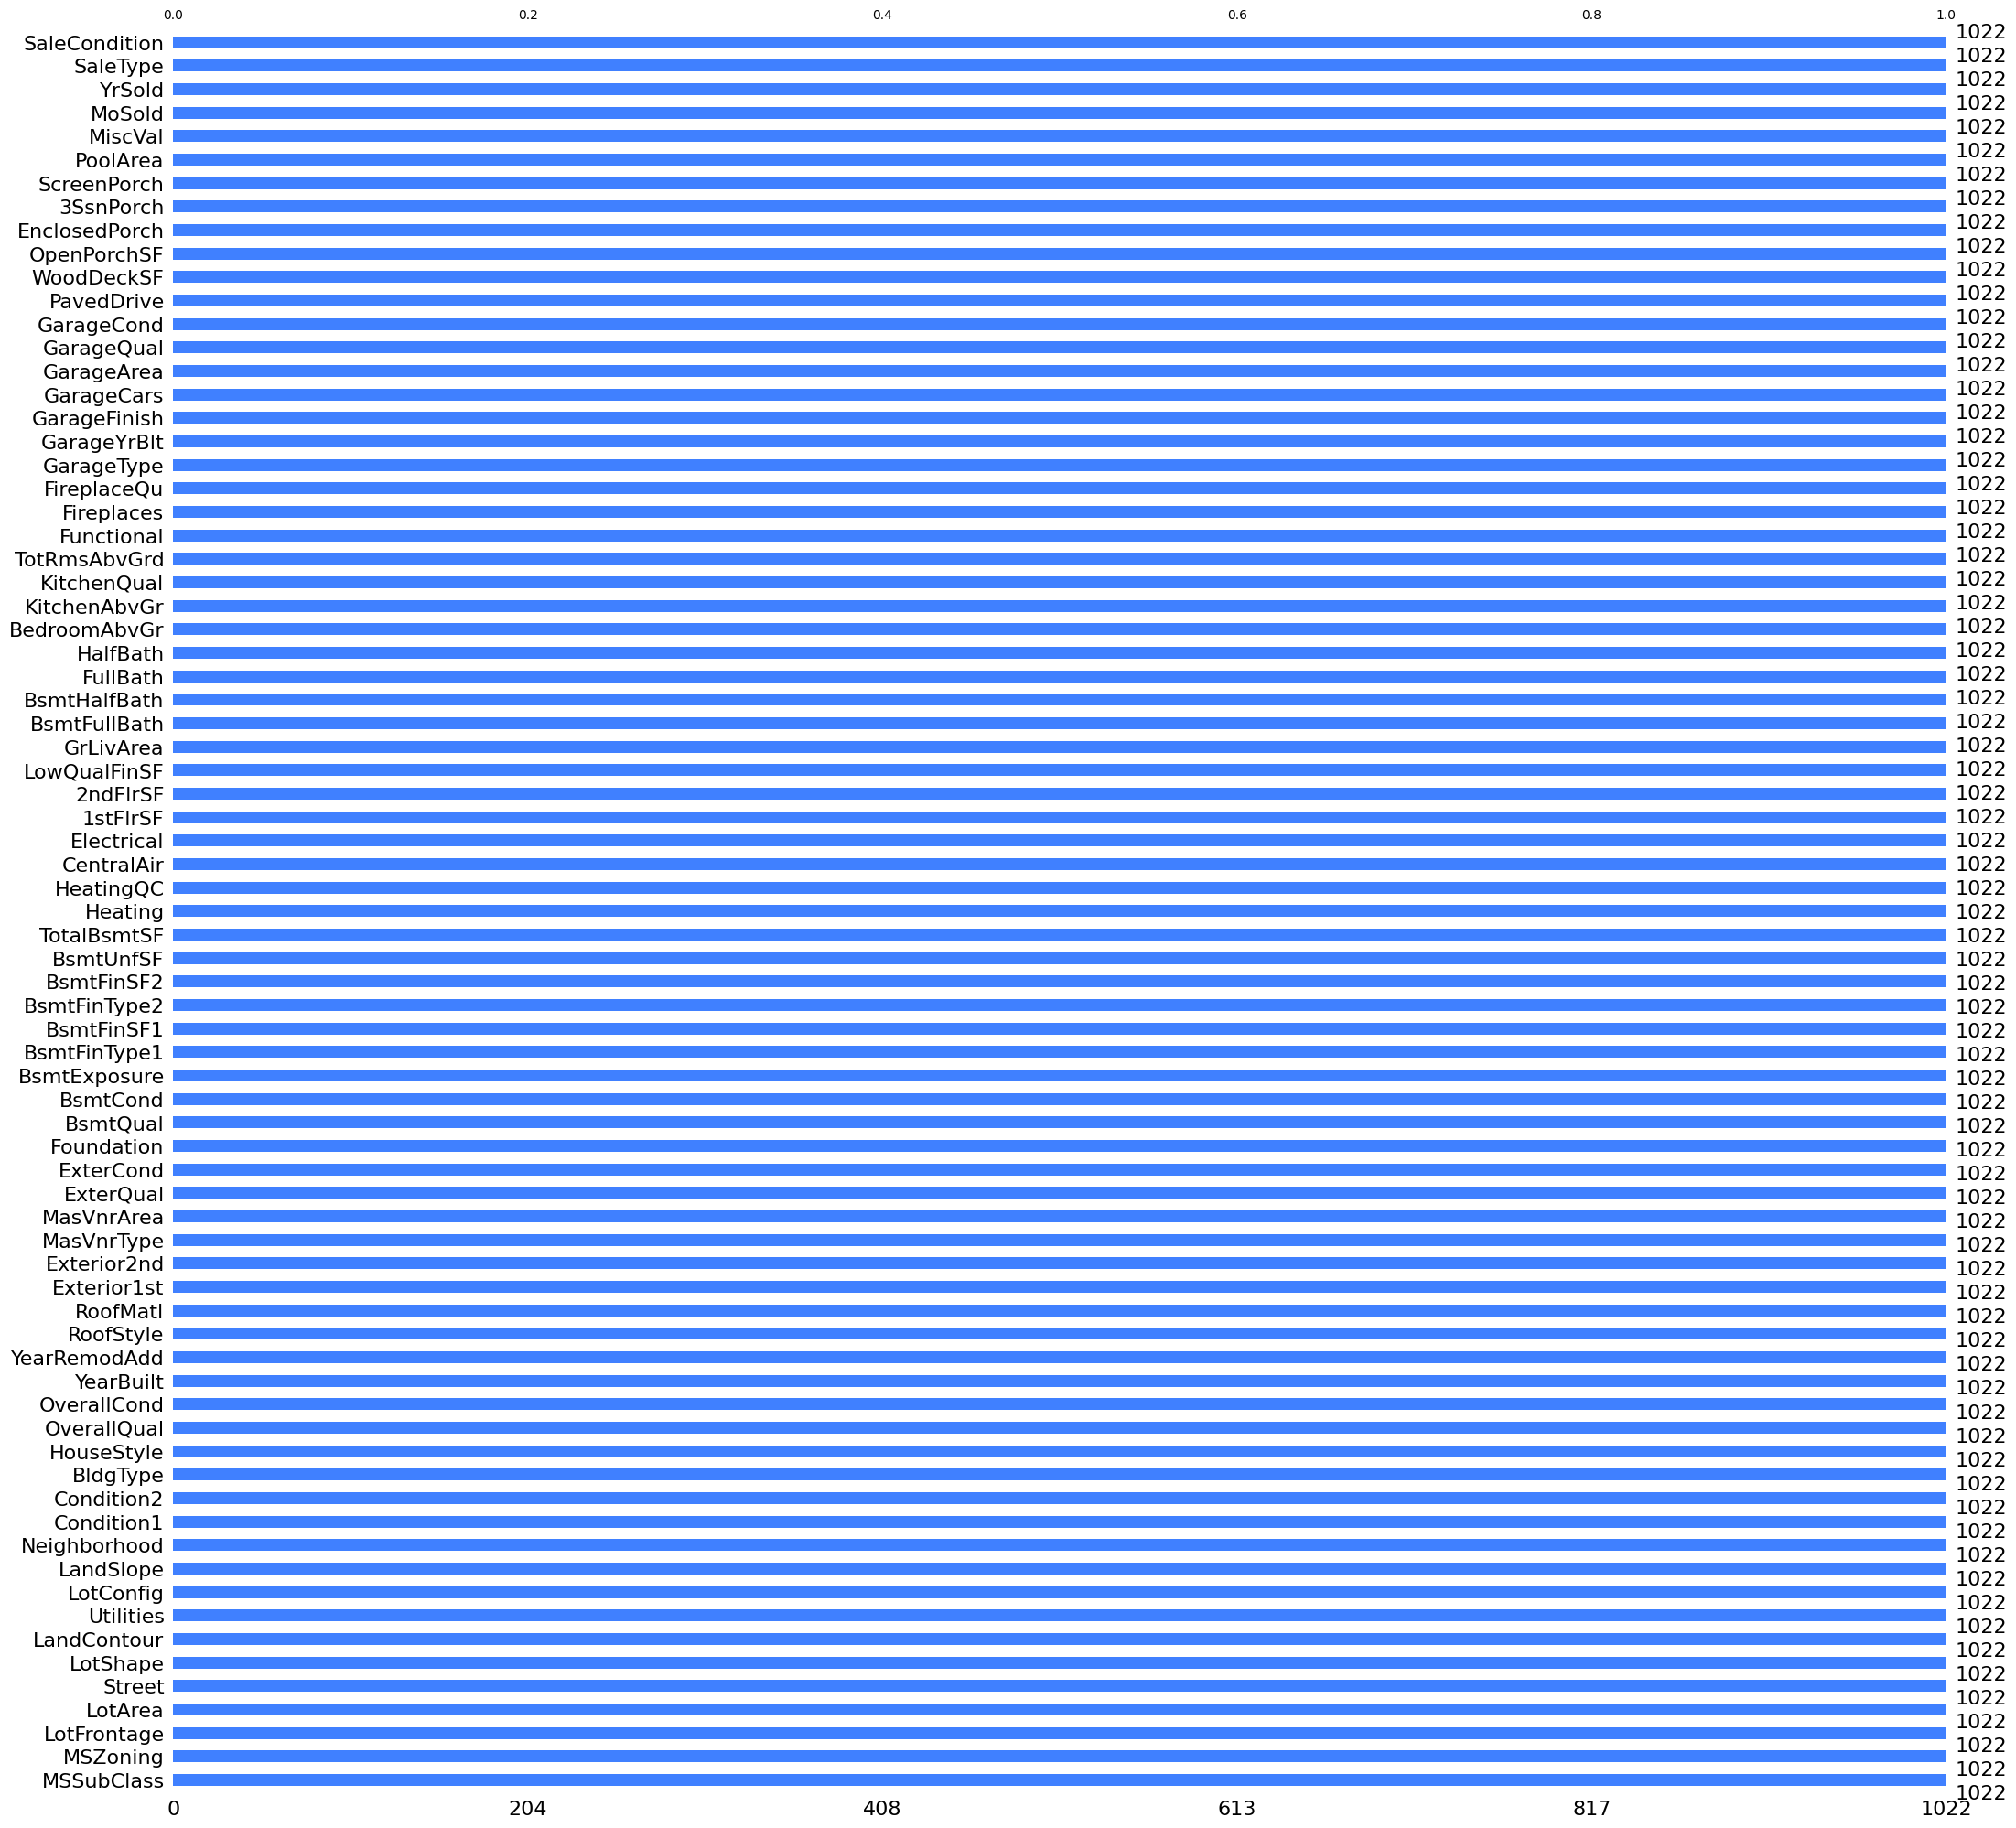

In [ ]:
msno.bar(abt_03, color=(0.25, 0.5, 1))

<Axes: >

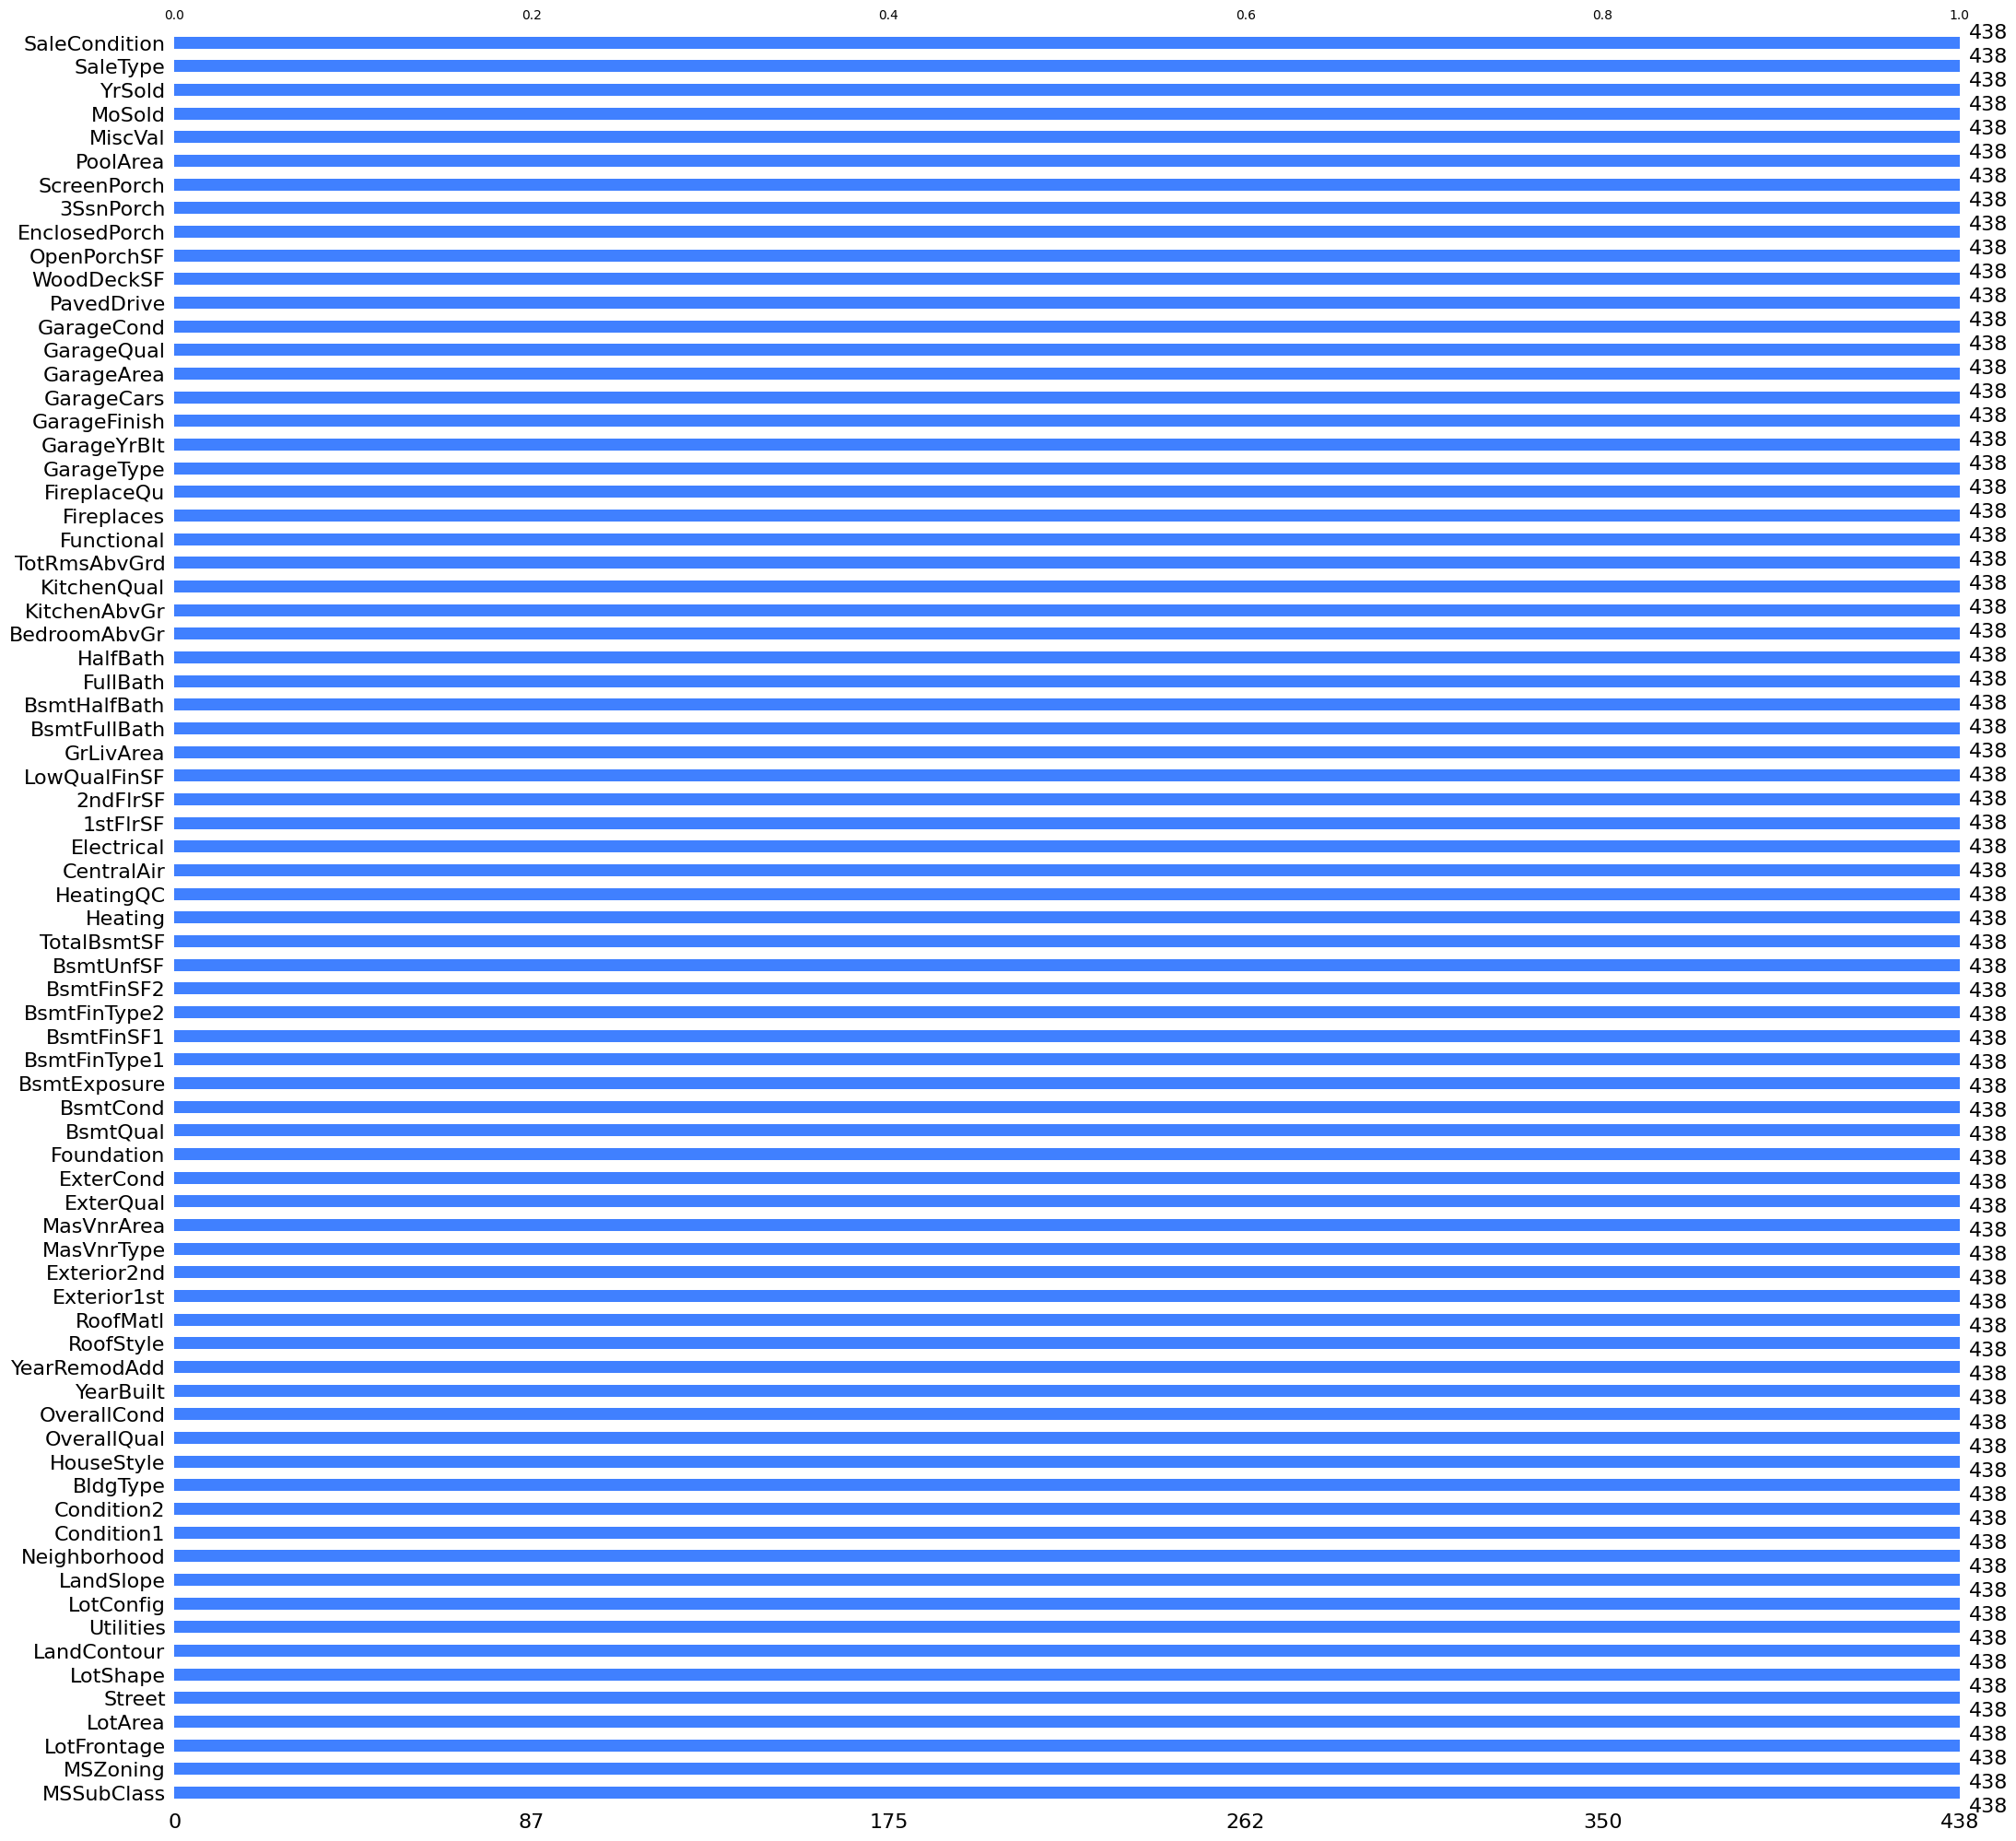

In [ ]:
msno.bar(test_prod, color=(0.25, 0.5, 1))

## Tratamento das Variáveis Numéricas

In [ ]:
abt_03.shape

(1022, 75)

In [ ]:
# Padronização dos dados
from sklearn.preprocessing import StandardScaler

# Instanciando o scaler
scaler = StandardScaler()

# Selecionando colunas numéricas
numeric_cols = abt_03.select_dtypes(include=['float64', 'int64','int32']).columns

# Padronizando a base de treino
abt_03[numeric_cols] = scaler.fit_transform(abt_03[numeric_cols])
abt_04 = pd.DataFrame(abt_03, columns=abt_03.columns, index=abt_03.index)

# Salva o scaler em um arquivo .pkl
with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_scaler_a014.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
abt_04.shape

(1022, 75)

In [ ]:
abt_04.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,-0.868950,RL,0.418036,-0.030504,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,0.636031,0.392266,-0.032378,-0.711644,Hip,CompShg,Plywood,Plywood,BrkFace,1.060159,TA,TA,PConc,TA,TA,No,Unf,-0.970484,Unf,-0.280335,1.643785,0.546130,GasA,Gd,Y,SBrkr,1.315652,-0.802294,-0.120313,0.287835,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,TA,0.279234,Typ,0.594240,Gd,Attchd,-0.359465,Unf,0.296063,0.253813,TA,TA,Y,0.003427,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.514944,0.140293,WD,Normal
1452,2.882618,RM,-1.536417,-0.624365,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,-0.823057,-0.508624,1.106434,0.976164,Gable,CompShg,VinylSd,VinylSd,BrkFace,-0.146552,TA,TA,PConc,Gd,TA,Gd,GLQ,0.219303,Unf,-0.280335,-1.281383,-1.146608,GasA,Gd,Y,SBrkr,-0.251022,-0.802294,-0.120313,-0.861565,1.112115,-0.247663,-1.069941,-0.758517,-1.098297,-0.212318,TA,-0.948194,Typ,-0.943262,VERIFICAR,Basment,1.090550,Fin,0.296063,0.229814,TA,TA,Y,-0.741099,-0.311187,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.514944,-1.368961,WD,Normal
762,0.068942,FV,0.070577,-0.185924,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,0.636031,-0.508624,1.236584,1.169056,Gable,CompShg,VinylSd,VinylSd,VERIFICAR,-0.610671,TA,TA,PConc,Gd,TA,Mn,GLQ,-0.918281,Unf,-0.280335,0.360659,-0.679260,GasA,Ex,Y,SBrkr,-1.042064,0.973582,-0.120313,0.033459,-0.814295,-0.247663,0.767840,1.265515,0.135175,-0.212318,Gd,0.279234,Typ,-0.943262,VERIFICAR,Attchd,1.256266,Unf,0.296063,0.656997,TA,TA,Y,0.542828,-0.065423,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.137417,1.649546,Con,Normal
932,-0.868950,RL,0.591765,0.081645,Pave,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,2.095118,-0.508624,1.138972,1.024387,Hip,CompShg,VinylSd,ImStucc,Stone,1.141380,Ex,TA,PConc,Ex,Gd,No,Unf,-0.970484,Unf,-0.280335,2.991965,1.890034,GasA,Ex,Y,SBrkr,1.888387,-0.802294,-0.120313,0.708025,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,Ex,0.892948,Typ,0.594240,Gd,Attchd,1.131979,Fin,1.665189,1.492165,TA,TA,Y,-0.741099,2.045255,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.269997,-0.614334,WD,Normal
435,0.068942,RL,-1.188959,-0.006927,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,PosN,Norm,1Fam,2Story,0.636031,0.392266,0.813597,0.542156,Gable,CompShg,VinylSd,VinylSd,VERIFICAR,-0.610671,Gd,TA,PConc,Gd,TA,Av,GLQ,-0.133065,ALQ,1.995752,-1.124357,-0.583107,GasA,Ex,Y,SBrkr,-0.880260,1.089252,-0.120313,0.248265,1.112115,-0.247663,0.767840,1.265515,0.135175,-0.212318,Gd,-0.334480,Typ,0.594240,TA,Attchd,0.717689,RFn,0.296063,0.349809,TA,TA,Y,0.459259,0.165884,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.892471,0.894920,ConLw,Normal


In [ ]:
# Aplicando a padronização na base de teste

#Carregar o scaler
with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_scaler_a014.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

test_prod[numeric_cols] = loaded_scaler.transform(test_prod[numeric_cols])
test_prod_scaler = pd.DataFrame(test_prod, columns=test_prod.columns, index=test_prod.index)
test_prod_scaler.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,-0.868950,RL,-0.016287,-0.205881,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,-0.093513,2.194045,-0.260141,0.879717,Hip,CompShg,HdBoard,HdBoard,VERIFICAR,-0.610671,TA,TA,CBlock,TA,TA,No,GLQ,0.471617,Unf,-0.280335,-0.393065,-0.001718,GasA,TA,Y,SBrkr,-0.261295,-0.802294,-0.120313,-0.869102,-0.814295,3.901704,-1.069941,-0.758517,0.135175,-0.212318,TA,-0.334480,Typ,-0.943262,VERIFICAR,Attchd,-0.649468,RFn,-1.073062,-1.022939,TA,TA,Y,0.717564,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.647524,-1.368961,WD,Normal
1105,0.068942,RL,1.199817,0.133392,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.365574,-0.508624,0.748522,0.493933,Gable,CompShg,HdBoard,HdBoard,BrkFace,1.489470,Gd,TA,PConc,Ex,TA,Av,GLQ,1.274234,Unf,-0.280335,-0.314552,0.901672,GasA,Ex,Y,SBrkr,0.848218,1.742448,-0.120313,2.059040,1.112115,-0.247663,0.767840,1.265515,0.135175,-0.212318,Gd,1.506662,Typ,2.131743,TA,Attchd,0.634831,RFn,0.296063,1.127379,TA,TA,Y,0.671981,-0.253360,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.892471,1.649546,WD,Normal
413,-0.634477,RM,-0.624339,-0.157666,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,-0.823057,0.392266,-1.431491,-1.676106,Gable,CompShg,WdShing,Wd Shng,VERIFICAR,-0.610671,TA,TA,CBlock,TA,TA,No,Unf,-0.970484,Unf,-0.280335,0.979790,-0.115759,GasA,Gd,Y,FuseA,-0.364028,-0.802294,-0.120313,-0.944472,-0.814295,-0.247663,-1.069941,-0.758517,-1.098297,-0.212318,TA,-0.948194,Typ,0.594240,Gd,Detchd,-2.140911,Unf,0.296063,-0.562156,TA,TA,Y,-0.741099,-0.715974,1.767303,-0.119317,-0.275896,-0.069193,-0.122987,-1.269997,1.649546,WD,Normal
522,-0.165531,RM,-0.884933,-0.507359,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,-0.093513,1.293156,-0.780741,-1.676106,Gable,CompShg,CemntBd,CmentBd,VERIFICAR,-0.610671,TA,Gd,CBlock,TA,TA,No,ALQ,-0.102613,Unf,-0.280335,0.075769,-0.124704,GasA,Ex,Y,SBrkr,-0.425667,0.694613,-0.120313,0.253918,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,TA,0.279234,Typ,2.131743,Gd,Detchd,-1.188045,Unf,0.296063,-0.274167,TA,TA,Y,-0.741099,-0.369014,0.238954,-0.119317,-0.275896,-0.069193,-0.122987,1.372691,-1.368961,WD,Normal
1036,-0.868950,RL,0.808926,0.190085,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,2.095118,-0.508624,1.171509,1.120833,Hip,CompShg,VinylSd,VinylSd,Stone,-0.204567,Gd,TA,PConc,Ex,TA,Gd,GLQ,1.252482,Unf,-0.280335,0.060067,1.252742,GasA,Ex,Y,SBrkr,1.156417,-0.802294,-0.120313,0.171011,1.112115,-0.247663,0.767840,-0.758517,-1.098297,-0.212318,Ex,-0.334480,Typ,0.594240,Ex,Attchd,1.214837,Fin,1.665189,2.087343,TA,TA,Y,0.991063,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,0.995164,0.894920,WD,Normal


In [ ]:
test_prod_scaler.shape

(438, 75)

## Tratamento das Variáveis Categóricas

In [ ]:
#categóricas de alta cardinalidade (LabelEncoder)

card_cutoff = 20
df_categ_labelenc = metadados_df[(metadados_df['cardinalidade'] > card_cutoff) & (metadados_df['tipo'] == 'object')]
lista_vars_abt = list(abt_04.columns)

lista_lenc = list(df_categ_labelenc.nome_variavel.values)

for item in lista_drop_nulos_numericas:
    if item in lista_lenc:
        lista_lenc.remove(item)

print('Lista de vars para Label Encoding: ',lista_lenc)

Lista de vars para Label Encoding:  ['Neighborhood']


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in lista_lenc:
    encoder = LabelEncoder()
    abt_04[col] = encoder.fit_transform(abt_04[col])

    # Armazena o encoder para a coluna atual em um dicionário
    encoders[col] = encoder

# Salva o dicionário de encoders e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoders': encoders,
    'columns': lista_lenc
}

with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_labelenc_a014.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

In [ ]:
# Carregar os encoders e a lista de colunas
with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_labelenc_a014.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoders = loaded_data['encoders']
loaded_columns = loaded_data['columns']

for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        test_prod_scaler[col] = loaded_encoders[col].transform(test_prod_scaler[col])

In [ ]:
test_prod_scaler.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,-0.868950,RL,-0.016287,-0.205881,Pave,Reg,Lvl,AllPub,Inside,Gtl,19,Norm,Norm,1Fam,1Story,-0.093513,2.194045,-0.260141,0.879717,Hip,CompShg,HdBoard,HdBoard,VERIFICAR,-0.610671,TA,TA,CBlock,TA,TA,No,GLQ,0.471617,Unf,-0.280335,-0.393065,-0.001718,GasA,TA,Y,SBrkr,-0.261295,-0.802294,-0.120313,-0.869102,-0.814295,3.901704,-1.069941,-0.758517,0.135175,-0.212318,TA,-0.334480,Typ,-0.943262,VERIFICAR,Attchd,-0.649468,RFn,-1.073062,-1.022939,TA,TA,Y,0.717564,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.647524,-1.368961,WD,Normal
1105,0.068942,RL,1.199817,0.133392,Pave,IR1,Lvl,AllPub,Corner,Gtl,15,Norm,Norm,1Fam,2Story,1.365574,-0.508624,0.748522,0.493933,Gable,CompShg,HdBoard,HdBoard,BrkFace,1.489470,Gd,TA,PConc,Ex,TA,Av,GLQ,1.274234,Unf,-0.280335,-0.314552,0.901672,GasA,Ex,Y,SBrkr,0.848218,1.742448,-0.120313,2.059040,1.112115,-0.247663,0.767840,1.265515,0.135175,-0.212318,Gd,1.506662,Typ,2.131743,TA,Attchd,0.634831,RFn,0.296063,1.127379,TA,TA,Y,0.671981,-0.253360,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.892471,1.649546,WD,Normal
413,-0.634477,RM,-0.624339,-0.157666,Pave,Reg,Lvl,AllPub,Inside,Gtl,17,Artery,Norm,1Fam,1Story,-0.823057,0.392266,-1.431491,-1.676106,Gable,CompShg,WdShing,Wd Shng,VERIFICAR,-0.610671,TA,TA,CBlock,TA,TA,No,Unf,-0.970484,Unf,-0.280335,0.979790,-0.115759,GasA,Gd,Y,FuseA,-0.364028,-0.802294,-0.120313,-0.944472,-0.814295,-0.247663,-1.069941,-0.758517,-1.098297,-0.212318,TA,-0.948194,Typ,0.594240,Gd,Detchd,-2.140911,Unf,0.296063,-0.562156,TA,TA,Y,-0.741099,-0.715974,1.767303,-0.119317,-0.275896,-0.069193,-0.122987,-1.269997,1.649546,WD,Normal
522,-0.165531,RM,-0.884933,-0.507359,Pave,Reg,Lvl,AllPub,Corner,Gtl,3,Feedr,Norm,1Fam,1.5Fin,-0.093513,1.293156,-0.780741,-1.676106,Gable,CompShg,CemntBd,CmentBd,VERIFICAR,-0.610671,TA,Gd,CBlock,TA,TA,No,ALQ,-0.102613,Unf,-0.280335,0.075769,-0.124704,GasA,Ex,Y,SBrkr,-0.425667,0.694613,-0.120313,0.253918,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,TA,0.279234,Typ,2.131743,Gd,Detchd,-1.188045,Unf,0.296063,-0.274167,TA,TA,Y,-0.741099,-0.369014,0.238954,-0.119317,-0.275896,-0.069193,-0.122987,1.372691,-1.368961,WD,Normal
1036,-0.868950,RL,0.808926,0.190085,Pave,IR1,HLS,AllPub,Inside,Gtl,23,Norm,Norm,1Fam,1Story,2.095118,-0.508624,1.171509,1.120833,Hip,CompShg,VinylSd,VinylSd,Stone,-0.204567,Gd,TA,PConc,Ex,TA,Gd,GLQ,1.252482,Unf,-0.280335,0.060067,1.252742,GasA,Ex,Y,SBrkr,1.156417,-0.802294,-0.120313,0.171011,1.112115,-0.247663,0.767840,-0.758517,-1.098297,-0.212318,Ex,-0.334480,Typ,0.594240,Ex,Attchd,1.214837,Fin,1.665189,2.087343,TA,TA,Y,0.991063,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,0.995164,0.894920,WD,Normal


In [ ]:
 ## Tratamento para categóricas de baixa cardinalidade

In [ ]:
from sklearn.preprocessing import OneHotEncoder

card_cutoff = 20
df_categ_onehot = metadados_df[(metadados_df['cardinalidade'] <= card_cutoff) & (metadados_df['tipo'] == 'object')]
lista_onehot = list(df_categ_onehot.nome_variavel.values)
print('Lista de vars para OneHot Encoding: ',lista_onehot)


Lista de vars para OneHot Encoding:  ['Heating', 'CentralAir', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MSZoning', 'HeatingQC', 'Electrical', 'MasVnrType', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'ExterQual', 'SaleCondition', 'Condition2', 'HouseStyle', 'Utilities', 'Exterior2nd', 'LandContour', 'LotShape', 'Street', 'Condition1', 'LotConfig', 'BldgType', 'LandSlope', 'Exterior1st', 'RoofMatl', 'RoofStyle']


In [ ]:

# Instanciando o encoder
encoder = OneHotEncoder(handle_unknown='ignore',drop='first', sparse_output=False)

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(abt_04[lista_onehot])
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=abt_04.index)

abt_04= pd.concat([abt_04.drop(lista_onehot, axis=1), encoded_df], axis=1)

# Salva o encoder e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoder': encoder,
    'columns': lista_onehot
}


with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_onehotenc_a014.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

In [ ]:
# Carregar o encoder e a lista de colunas
with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_onehotenc_a014.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']

# Aplicando a transformação na base de teste
encoded_data_test = loaded_encoder.transform(test_prod_scaler[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=test_prod_scaler.index)

test_prod_02 = pd.concat([test_prod_scaler.drop(loaded_columns, axis=1), encoded_df_test], axis=1)


In [ ]:
coluna = 'Electrical'
valor = 'Mix'

quantidade_mix = test_prod_scaler[coluna].value_counts().get(valor, 0)
print(f"Quantidade de '{valor}' na coluna '{coluna}': {quantidade_mix}")


Quantidade de 'Mix' na coluna 'Electrical': 1


Aplicando o OneHotEncoder descobri que a variável 'Electrical' possui o valor
'Mix' somente na base de teste.

Verifiquei quantas vezes o valor 'Mix' aparece para decidir qual o procedimento
a ser utilizado no tratamento da variável.

o valor aparece somente 1 vez.

Assim, decidi configurar o OneHotEncoder com handle_unknown='ignore'.

O valor 'Mix' será simplesmente ignorado na codificação — ou seja, todos os dummies para essa variável ficarão zerados para essa linha específica.

O impacto, em razão do valor aparecer apenas 1 vez, é minimo para o treinamento do modelo de machine learning.


In [ ]:
test_prod_02.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_VERIFICAR,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_VERIFICAR,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_VERIFICAR,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_VERIFICAR,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_VERIFICAR,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Electrical_VERIFICAR,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_VERIFICAR,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_VERIFICAR,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_VERIFICAR,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_VERIFICAR,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_VERIFICAR,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_VERIFICAR,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Utilities_NoSeWa,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Pave,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LandSlope_Mod,LandSlope_Sev,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
892,-0.868950,-0.016287,-0.205881,19,-0.093513,2.194045,-0.260141,0.879717,-0.610671,0.471617,-0.280335,-0.393065,-0.001718,-0.261295,-0.802294,-0.120313,-0.869102,-0.814295,3.901704,-1.069941,-0.758517,0.135175,-0.212318,-0.334480,-0.943262,-0.649468,-1.073062,-1.022939,0.717564,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.647524,-1.368961,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0

In [ ]:
abt_04.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_VERIFICAR,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_VERIFICAR,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_VERIFICAR,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_VERIFICAR,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_VERIFICAR,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Electrical_VERIFICAR,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_VERIFICAR,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_VERIFICAR,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_VERIFICAR,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_VERIFICAR,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_VERIFICAR,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_VERIFICAR,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Utilities_NoSeWa,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Pave,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LandSlope_Mod,LandSlope_Sev,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
135,-0.868950,0.418036,-0.030504,14,0.636031,0.392266,-0.032378,-0.711644,1.060159,-0.970484,-0.280335,1.643785,0.546130,1.315652,-0.802294,-0.120313,0.287835,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,0.279234,0.594240,-0.359465,0.296063,0.253813,0.003427,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.514944,0.140293,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0

In [ ]:
#### Trazer o id e target para a tabela pós dataprep

abt_train = abt_04.merge(train[['Id', 'SalePrice']], left_index=True, right_index=True, how='inner')
abt_test = test_prod_02.merge(test[['Id', 'SalePrice']], left_index=True, right_index=True, how='inner')

In [ ]:
abt_train.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_VERIFICAR,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_VERIFICAR,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_VERIFICAR,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_VERIFICAR,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_VERIFICAR,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Electrical_VERIFICAR,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_VERIFICAR,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_VERIFICAR,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_VERIFICAR,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_VERIFICAR,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_VERIFICAR,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_VERIFICAR,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Utilities_NoSeWa,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Pave,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LandSlope_Mod,LandSlope_Sev,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Id,SalePrice
135,-0.868950,0.418036,-0.030504,14,0.636031,0.392266,-0.032378,-0.711644,1.060159,-0.970484,-0.280335,1.643785,0.546130,1.315652,-0.802294,-0.120313,0.287835,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,0.279234,0.594240,-0.359465,0.296063,0.253813,0.003427,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.514944,0.140293,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,

In [ ]:
abt_test.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_VERIFICAR,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_VERIFICAR,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_VERIFICAR,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_VERIFICAR,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_VERIFICAR,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Electrical_VERIFICAR,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_VERIFICAR,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_VERIFICAR,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_VERIFICAR,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_VERIFICAR,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_VERIFICAR,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_VERIFICAR,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Utilities_NoSeWa,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Pave,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LandSlope_Mod,LandSlope_Sev,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Id,SalePrice
892,-0.868950,-0.016287,-0.205881,19,-0.093513,2.194045,-0.260141,0.879717,-0.610671,0.471617,-0.280335,-0.393065,-0.001718,-0.261295,-0.802294,-0.120313,-0.869102,-0.814295,3.901704,-1.069941,-0.758517,0.135175,-0.212318,-0.334480,-0.943262,-0.649468,-1.073062,-1.022939,0.717564,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.647524,-1.368961,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.

In [ ]:
###Salvando tabelas de treino e teste pós preparação dos dados

abt_train.to_csv('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/abt_train.csv')
abt_test.to_csv('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/abt_test.csv')

### FEATURE IMPORTANCE

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import shap

In [ ]:
# Separando as variáveis de entrada (features) e de saída (target)
abt00 = abt_train
X = abt00.drop(axis=1,columns=['Id', 'SalePrice'])
y = abt00.SalePrice

In [ ]:
#Definindo e treinando o Modelo
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

Número de features selecionadas:  20


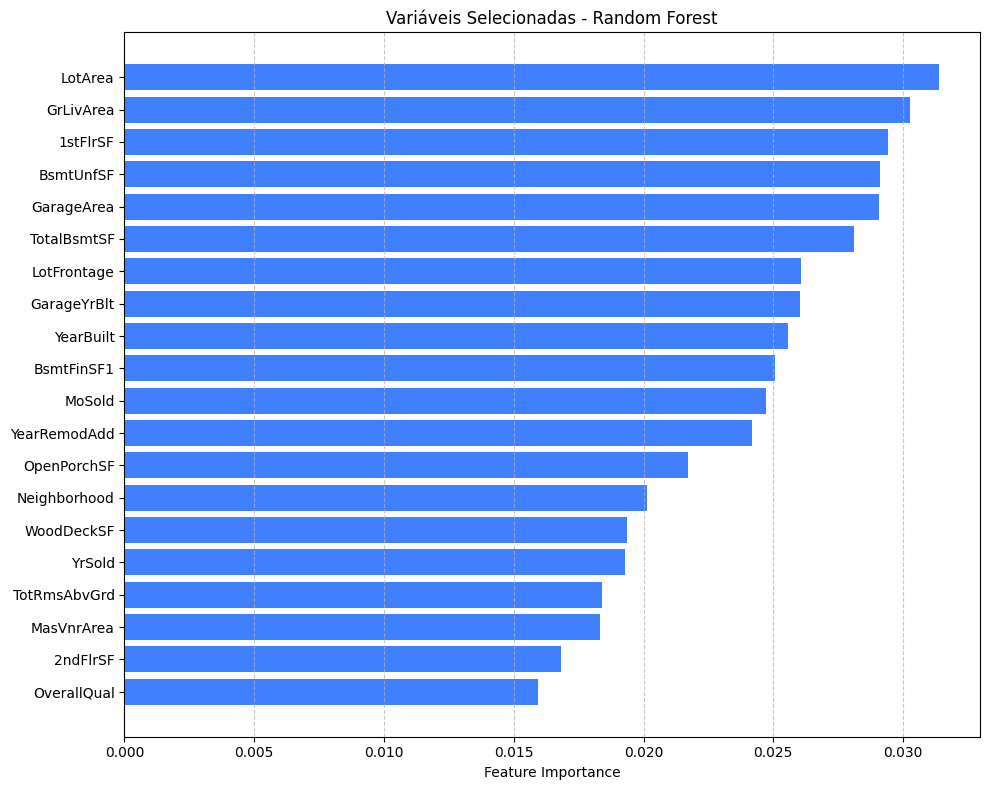

In [ ]:
# Obter importância das variáveis
feature_importances = rf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.5

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Salvar a lista em um arquivo .pkl
import pickle
with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_list_features_a014.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [ ]:
# Carregar a lista do arquivo .pkl
with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/prd_list_features_a014.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']


In [ ]:
lista_features = loaded_lista + ['SalePrice']
abt_01 = abt00[lista_features]

abt_01.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
135,0.418036,-0.030504,14,0.636031,-0.032378,-0.711644,1.060159,-0.970484,1.643785,0.546130,1.315652,-0.802294,0.287835,0.279234,-0.359465,0.253813,0.003427,-0.715974,-0.514944,0.140293,174000
1452,-1.536417,-0.624365,7,-0.823057,1.106434,0.976164,-0.146552,0.219303,-1.281383,-1.146608,-0.251022,-0.802294,-0.861565,-0.948194,1.090550,0.229814,-0.741099,-0.311187,-0.514944,-1.368961,145000
762,0.070577,-0.185924,21,0.636031,1.236584,1.169056,-0.610671,-0.918281,0.360659,-0.679260,-1.042064,0.973582,0.033459,0.279234,1.256266,0.656997,0.542828,-0.065423,-0.137417,1.649546,215200
932,0.591765,0.081645,21,2.095118,1.138972,1.024387,1.141380,-0.970484,2.991965,1.890034,1.888387,-0.802294,0.708025,0.892948,1.131979,1.492165,-0.741099,2.045255,-1.269997,-0.614334,320000
435,-1.188959,-0.006927,5,0.636031,0.813597,0.542156,-0.610671,-0.133065,-1.124357,-0.583107,-0.880260,1.089252,0.248265,-0.334480,0.717689,0.349809,0.459259,0.165884,-0.892471,0.894920,212000


In [ ]:
abt_test = pd.read_csv('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/abt_test.csv')
abt_test.drop(axis=1,columns=['Id'],inplace=True)
abt_test.shape


(438, 221)

In [ ]:
lista_features = loaded_lista + ['SalePrice']
abt_01_test = abt_test[lista_features]

abt_01_test.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,-0.016287,-0.205881,19,-0.093513,-0.260141,0.879717,-0.610671,0.471617,-0.393065,-0.001718,-0.261295,-0.802294,-0.869102,-0.334480,-0.649468,-1.022939,0.717564,-0.715974,-1.647524,-1.368961,154500
1,1.199817,0.133392,15,1.365574,0.748522,0.493933,1.489470,1.274234,-0.314552,0.901672,0.848218,1.742448,2.059040,1.506662,0.634831,1.127379,0.671981,-0.253360,-0.892471,1.649546,325000
2,-0.624339,-0.157666,17,-0.823057,-1.431491,-1.676106,-0.610671,-0.970484,0.979790,-0.115759,-0.364028,-0.802294,-0.944472,-0.948194,-2.140911,-0.562156,-0.741099,-0.715974,-1.269997,1.649546,115000
3,-0.884933,-0.507359,3,-0.093513,-0.780741,-1.676106,-0.610671,-0.102613,0.075769,-0.124704,-0.425667,0.694613,0.253918,0.279234,-1.188045,-0.274167,-0.741099,-0.369014,1.372691,-1.368961,159000
4,0.808926,0.190085,23,2.095118,1.171509,1.120833,-0.204567,1.252482,0.060067,1.252742,1.156417,-0.802294,0.171011,-0.334480,1.214837,2.087343,0.991063,-0.715974,0.995164,0.894920,315500


In [ ]:
abt_01.shape , abt_01_test.shape

((1022, 21), (438, 21))

In [ ]:
# Salvando abt para treinamento dos modelos

abt_01.to_csv('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/abt_fs01_train.csv')
abt_01_test.to_csv('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/abt_fs01_test.csv')

# Modelagem

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import xgboost as xgb
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score


In [ ]:
# Separando as variáveis de entrada (features) e de saída (target)
X = abt_01.drop(columns=["SalePrice"])
y = abt_01["SalePrice"]

In [ ]:
# Separando uma amostra de 70% para treinar o modelo e 30% para testar o modelo
# Holdout 70/30 (out-of-sample)


# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape,X_test.shape

((817, 20), (205, 20))

In [ ]:
# Definindo o modelo
model = RandomForestRegressor()

# Definindo os parâmetros para o grid search
param_grid = {
    'n_estimators': [10, 50,100],
    'max_depth': [2, 3, 5],
    'min_samples_split': [0.001, 0.01],
    'min_samples_leaf': [2, 0.01],
    'bootstrap': [True, False],
    # 'max_features': ['auto', 'sqrt', 'log2']
}

# Definindo os parâmetros para o grid search
param_grid = {
    'n_estimators': [10, 50,100],
    'max_depth': [2, 3, 5],
    'min_samples_split': [0.001, 0.01],
    'min_samples_leaf': [2, 0.01],
    'bootstrap': [True, False],
    # 'max_features': ['auto', 'sqrt', 'log2']
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='r2',
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor R2: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)

best_model_rf = grid.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Melhores Parâmetros:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 0.01, 'n_estimators': 100}
Melhor R2:  0.7634136485542788


In [ ]:
# Definindo o modelo
model = GradientBoostingRegressor()

# Definindo os parâmetros para o grid search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9],
    'max_features': ['sqrt', 'log2', None]
}


# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='r2',
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor R2: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)

best_model_gbm = grid.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Melhores Parâmetros:  {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200, 'subsample': 0.8}
Melhor R2:  0.8406625477432661


In [ ]:
# Definindo o modelo
model = lgb.LGBMRegressor()

# Definindo os parâmetros para o grid search
param_grid = {
    'max_depth' : [3,5,7],
    'num_leaves': [5, 31],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [2, 5],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='r2',
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train, y_train)


# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor R2: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)

best_model_lightgbm = grid.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2465
[LightGBM] [Info] Number of data points in the train set: 817, number of used features: 20
[LightGBM] [

## Salvando artefatos dos modelos

In [ ]:
import pickle

with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/modelos/best_model_rf.pkl', 'wb') as file:
  pickle.dump(best_model_rf, file)

with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/modelos/best_model_gbm.pkl', 'wb') as file:
  pickle.dump(best_model_gbm, file)

with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/modelos/best_model_lightgbm.pkl', 'wb') as file:
  pickle.dump(best_model_lightgbm, file)

## Escoragem

In [ ]:
# Retirar ID e Target das tabelas
abt_train01 = abt_01.drop(axis=1, columns=['SalePrice'])
abt_test01 = abt_01_test.drop(axis=1, columns=['SalePrice'])



In [ ]:
# Carregando modelo campeão

with open('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/modelos/best_model_gbm.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

loaded_model

GradientBoostingRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                          min_samples_split=4, n_estimators=200, subsample=0.8)

In [ ]:
# Escorando base de treino
predict = loaded_model.predict(abt_train01)
abt_train01['label_predict']=predict

# Escorando base de teste
predict = loaded_model.predict(abt_test01)
abt_test01['label_predict']=predict

In [ ]:
abt_train01.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,label_predict
135,0.418036,-0.030504,14,0.636031,-0.032378,-0.711644,1.060159,-0.970484,1.643785,0.546130,1.315652,-0.802294,0.287835,0.279234,-0.359465,0.253813,0.003427,-0.715974,-0.514944,0.140293,176931.684966
1452,-1.536417,-0.624365,7,-0.823057,1.106434,0.976164,-0.146552,0.219303,-1.281383,-1.146608,-0.251022,-0.802294,-0.861565,-0.948194,1.090550,0.229814,-0.741099,-0.311187,-0.514944,-1.368961,138044.966865
762,0.070577,-0.185924,21,0.636031,1.236584,1.169056,-0.610671,-0.918281,0.360659,-0.679260,-1.042064,0.973582,0.033459,0.279234,1.256266,0.656997,0.542828,-0.065423,-0.137417,1.649546,216005.778773
932,0.591765,0.081645,21,2.095118,1.138972,1.024387,1.141380,-0.970484,2.991965,1.890034,1.888387,-0.802294,0.708025,0.892948,1.131979,1.492165,-0.741099,2.045255,-1.269997,-0.614334,253898.646309
435,-1.188959,-0.006927,5,0.636031,0.813597,0.542156,-0.610671,-0.133065,-1.124357,-0.583107,-0.880260,1.089252,0.248265,-0.334480,0.717689,0.349809,0.459259,0.165884,-0.892471,0.894920,209391.108738


In [ ]:
abt_test01.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,label_predict
0,-0.016287,-0.205881,19,-0.093513,-0.260141,0.879717,-0.610671,0.471617,-0.393065,-0.001718,-0.261295,-0.802294,-0.869102,-0.334480,-0.649468,-1.022939,0.717564,-0.715974,-1.647524,-1.368961,141052.086767
1,1.199817,0.133392,15,1.365574,0.748522,0.493933,1.489470,1.274234,-0.314552,0.901672,0.848218,1.742448,2.059040,1.506662,0.634831,1.127379,0.671981,-0.253360,-0.892471,1.649546,319998.428911
2,-0.624339,-0.157666,17,-0.823057,-1.431491,-1.676106,-0.610671,-0.970484,0.979790,-0.115759,-0.364028,-0.802294,-0.944472,-0.948194,-2.140911,-0.562156,-0.741099,-0.715974,-1.269997,1.649546,99276.250376
3,-0.884933,-0.507359,3,-0.093513,-0.780741,-1.676106,-0.610671,-0.102613,0.075769,-0.124704,-0.425667,0.694613,0.253918,0.279234,-1.188045,-0.274167,-0.741099,-0.369014,1.372691,-1.368961,134296.033378
4,0.808926,0.190085,23,2.095118,1.171509,1.120833,-0.204567,1.252482,0.060067,1.252742,1.156417,-0.802294,0.171011,-0.334480,1.214837,2.087343,0.991063,-0.715974,0.995164,0.894920,346842.417733


In [ ]:
abt_train01 = abt_train01.merge(abt_01[['SalePrice']], left_index=True, right_index=True, how='inner')

In [ ]:
abt_train01.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,label_predict,SalePrice
135,0.418036,-0.030504,14,0.636031,-0.032378,-0.711644,1.060159,-0.970484,1.643785,0.546130,1.315652,-0.802294,0.287835,0.279234,-0.359465,0.253813,0.003427,-0.715974,-0.514944,0.140293,176931.684966,174000
1452,-1.536417,-0.624365,7,-0.823057,1.106434,0.976164,-0.146552,0.219303,-1.281383,-1.146608,-0.251022,-0.802294,-0.861565,-0.948194,1.090550,0.229814,-0.741099,-0.311187,-0.514944,-1.368961,138044.966865,145000
762,0.070577,-0.185924,21,0.636031,1.236584,1.169056,-0.610671,-0.918281,0.360659,-0.679260,-1.042064,0.973582,0.033459,0.279234,1.256266,0.656997,0.542828,-0.065423,-0.137417,1.649546,216005.778773,215200
932,0.591765,0.081645,21,2.095118,1.138972,1.024387,1.141380,-0.970484,2.991965,1.890034,1.888387,-0.802294,0.708025,0.892948,1.131979,1.492165,-0.741099,2.045255,-1.269997,-0.614334,253898.646309,320000
435,-1.188959,-0.006927,5,0.636031,0.813597,0.542156,-0.610671,-0.133065,-1.124357,-0.583107,-0.880260,1.089252,0.248265,-0.334480,0.717689,0.349809,0.459259,0.165884,-0.892471,0.894920,209391.108738,212000
